In [1]:
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
import collections

In [2]:
import tcri

/Users/ceglian/Codebase/tcri/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
adata = sc.read("/Users/ceglian/Analysis/yost/yost_v2.h5ad")
ct = []
for x in adata.obs["response"]:
    if "yes" in x.lower():
        ct.append("R")
    else:
        ct.append("NR")
adata.obs["response"] = ct

#adata = adata[adata.obs["disease"] == "scc"]

ct = []
for x in adata.obs["cluster"]:
    if "CD8" not in x:
        x = "CD4_{}".format(x)
    if "naive" in x.lower():
        x = "Naive"
    ct.append(x)
adata.obs["phenotype"] = ct

In [4]:
tcri.pp.add_tcr_key(adata,"trb")

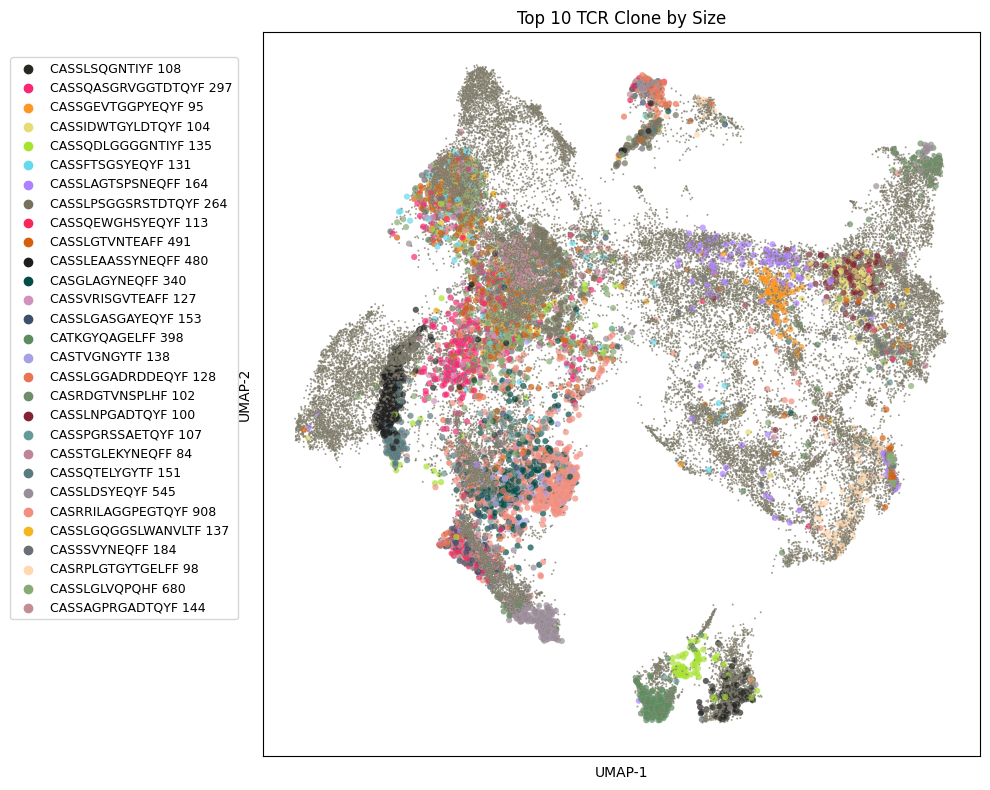

In [5]:
tcri.pl.tcr_umap(adata,top_n=30,size=20)

<AxesSubplot: xlabel='UMAP-1', ylabel='UMAP-2'>

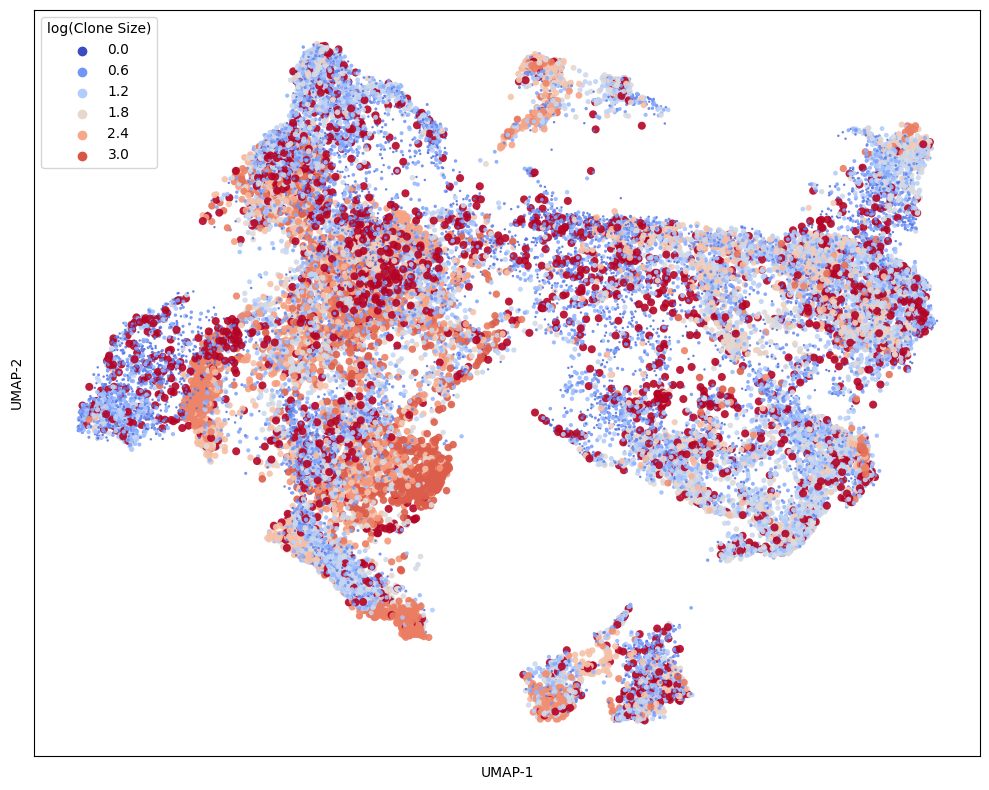

In [6]:
tcri.pl.clone_size(adata,scale=10,alpha=0.9)

In [7]:
adata.X = csr_matrix(adata.X)

In [8]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [9]:
tcri.pp.gene_entropy(adata)
adata = adata[:,adata.var["entropy"] > 0.]
adata

100%|██████████| 2000/2000 [00:02<00:00, 771.94it/s] 


In [10]:
tcri.pp.joint_distribution(adata)

In [39]:
markers = dict()
markers['Naive'] = ["IL7R",'TCF7','LEF1','SELL']
markers['Cytotoxic'] = ["GNLY",'GZMB','PRF1','NKG7',"GZMA",'GZMH']
markers['Dysfunctional'] = ["TIGIT",'LAG3','HAVCR2',"TOX",'ENTPD1']
markers['Memory'] = ["GZMK",'CRTAM','ZNF683']

In [35]:
nonresponder = adata[adata.obs["response"] == "NR"]
responder = adata[adata.obs["response"] == "R"]
tcri.pp.joint_distribution(nonresponder)
tcri.pp.joint_distribution(responder)

In [40]:
tcri.tl.marker_enrichment(adata,markers=markers).res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Memory,-0.387411,-0.811721,0.716502,0.703655,0.807302,2/3,21.30%,GZMK;CRTAM
1,prerank,Cytotoxic,0.422773,0.797942,0.676074,1.0,0.9285,2/6,20.30%,GZMH;GNLY
2,prerank,Dysfunctional,0.42908,0.796952,0.674528,1.0,0.929,3/5,35.30%,HAVCR2;LAG3;TOX
3,prerank,Naive,0.411323,0.727841,0.751971,0.747425,0.952,4/4,58.95%,TCF7;LEF1;SELL;IL7R


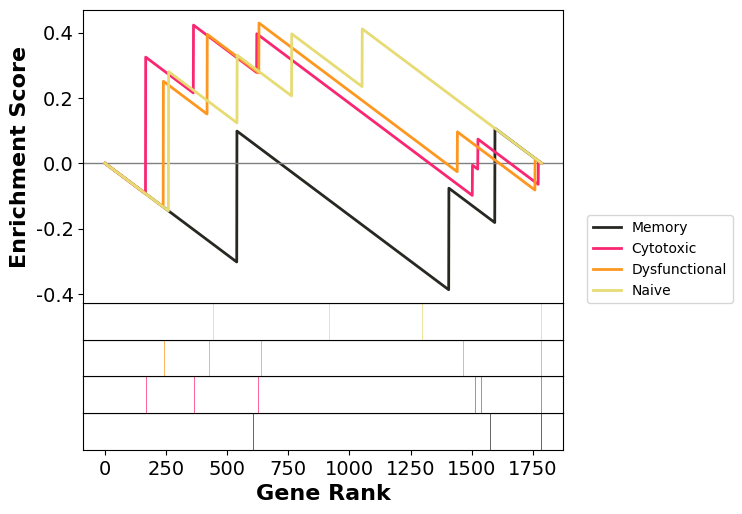

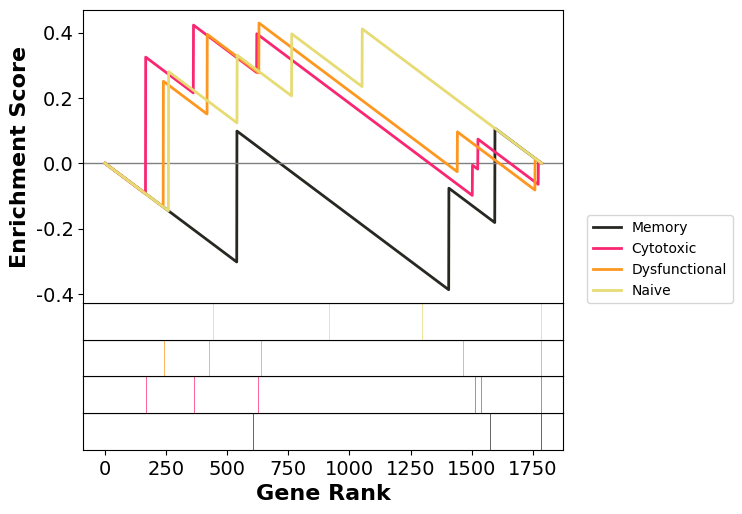

In [41]:
tcri.pl.marker_enrichment_score(adata,markers=markers)
tcri.pl.marker_enrichment_dotplot(adat,markers=markers)

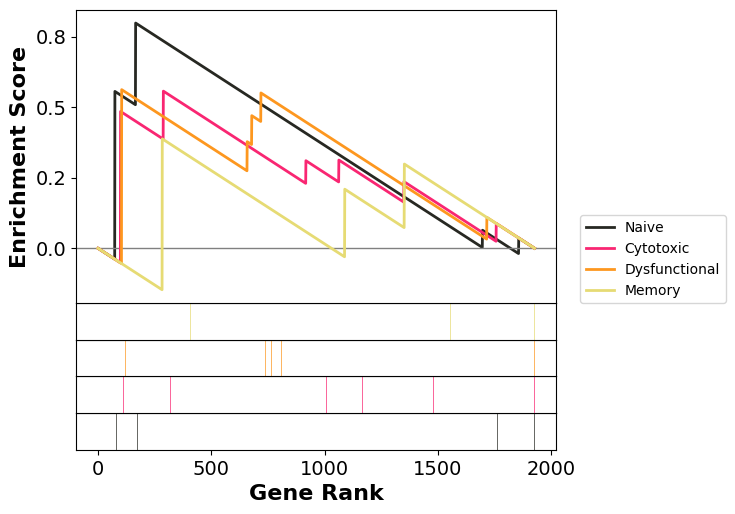

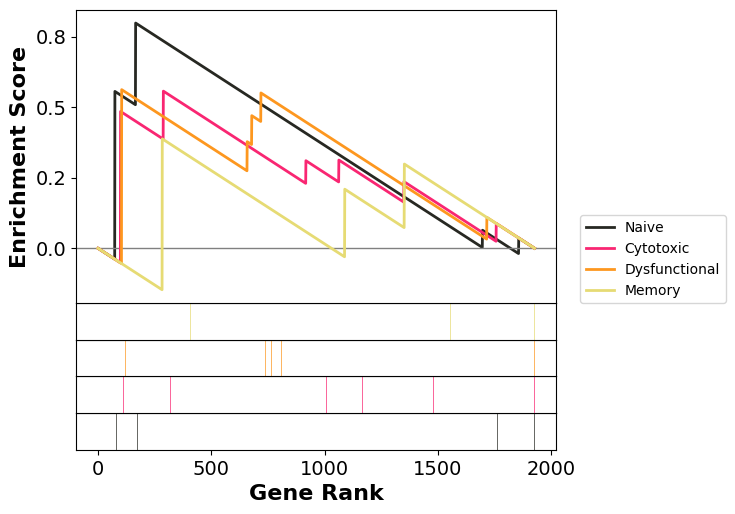

In [42]:
tcri.pl.marker_enrichment_score(responder,markers=markers)
tcri.pl.marker_enrichment_dotplot(responder,markers=markers)

In [ ]:
tcri.pl.marker_enrichment_score(nonresponder,markers=markers)
tcri.pl.marker_enrichment_dotplot(nonresponder,markers=markers)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CD4_Tfh_R v.s. CD4_Tfh_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.275e+02
CD8_eff_R v.s. CD8_eff_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.911e-01 U_stat=6.090e+02
CD8_mem_R v.s. CD8_mem_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.607e-01 U_stat=6.010e+02
CD8_ex_R v.s. CD8_ex_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.280e+02
CD4_Th17_R v.s. CD4_Th17_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.480e+02
CD4_Treg_R v.s. CD4_Treg_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.170e+02
CD4_Tregs_R v.s. CD4_Tregs_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni 

,Gene,Entropy
1990,BAG3,189.469421
1991,CDC42EP1,187.300003
1992,SQSTM1,186.822495
1993,BAG2,186.182739
1994,HJURP,180.336761
1995,TSPAN5,178.314346
1996,CXCL14,174.650436
1997,MGST2,173.395462
1998,LIME1,159.478531
1999,UBE2C,157.673080


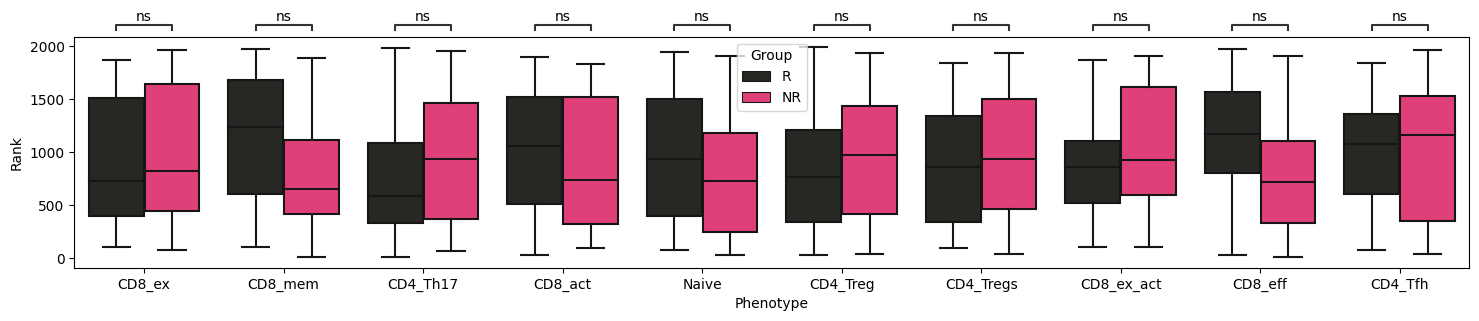

In [20]:
tcri.pp.joint_distribution(adata)
tcri.pl.rank_markers(adata,markers=markers,groupby="response",figsize=(18,3))
tcri.tl.rank_genes_by_clonotypic_entropy(adata).tail(10)

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

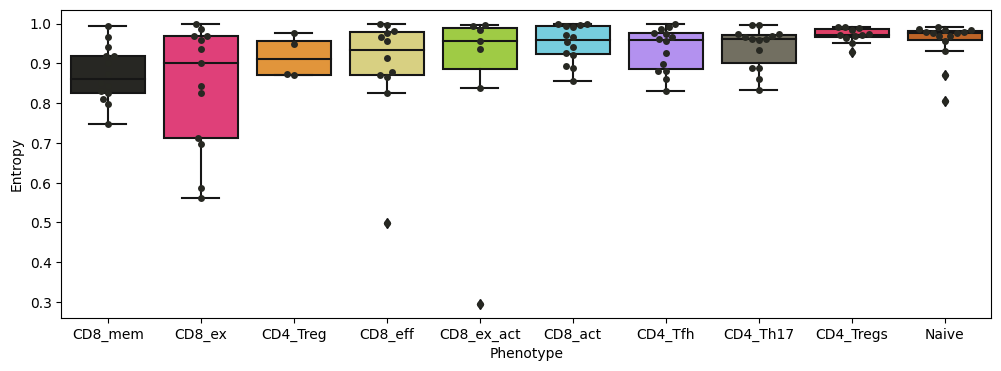

In [21]:
tcri.pl.transcriptional_entropy(adata, phenotype_key="phenotype", groupby="patient", figsize=(12,4))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive_R v.s. Naive_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.400e+01
CD4_Tregs_R v.s. CD4_Tregs_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.700e+01
CD8_ex_R v.s. CD8_ex_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.300e+01
CD8_mem_R v.s. CD8_mem_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+01
CD4_Treg_R v.s. CD4_Treg_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.000e+00
CD4_Th17_R v.s. CD4_Th17_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.788e-01 U_stat=4.100e+01
CD4_Tfh_R v.s. CD4_Tfh_NR: Mann-Whitney-Wilcoxon test two-sided with Bonferroni corr

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

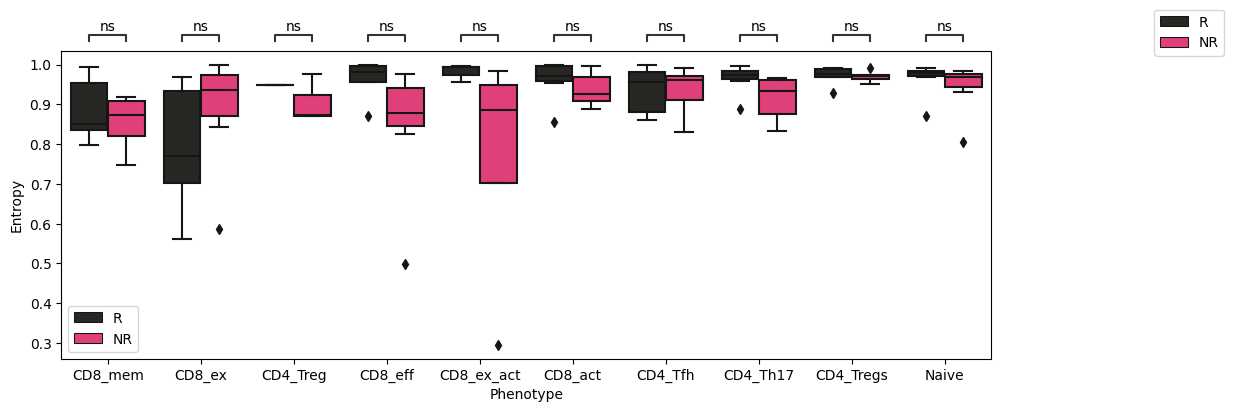

In [22]:
tcri.pl.transcriptional_entropy(adata, phenotype_key="phenotype", groupby="patient", splitby="response", figsize=(12,4))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CD4_Tfh_pre v.s. CD4_Tfh_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+01
CD4_Tregs_pre v.s. CD4_Tregs_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.600e+01
CD8_mem_pre v.s. CD8_mem_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.303e-01 U_stat=9.000e+00
CD8_ex_act_pre v.s. CD8_ex_act_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
CD8_ex_pre v.s. CD8_ex_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.200e+01
CD4_Treg_pre v.s. CD4_Treg_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.000e+00
CD4_Th17_pre v.s. CD4_Th17_post: Mann-Whitney-Wilcox

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

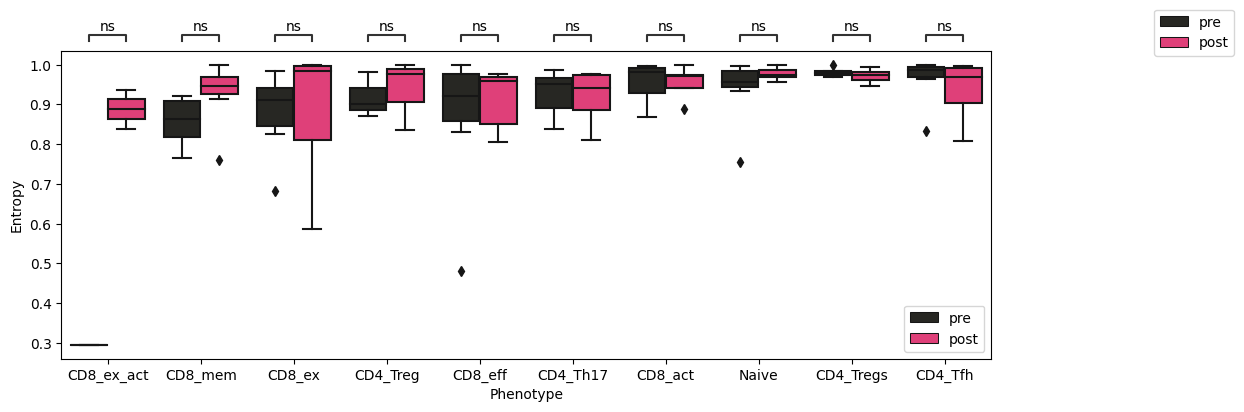

In [23]:

tcri.pl.transcriptional_entropy(nonresponder, phenotype_key="phenotype", groupby="patient", splitby="treatment")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CD8_ex_act_pre v.s. CD8_ex_act_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
CD8_eff_pre v.s. CD8_eff_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.000e+00
CD8_mem_pre v.s. CD8_mem_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.000e+01
CD8_ex_pre v.s. CD8_ex_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00
CD4_Treg_pre v.s. CD4_Treg_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=0.000e+00
CD4_Tregs_pre v.s. CD4_Tregs_post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.800e+01
CD4_Th17_pre v.s. CD4_Th17_post: Mann-Whitney-Wilcox

<AxesSubplot: xlabel='Phenotype', ylabel='Entropy'>

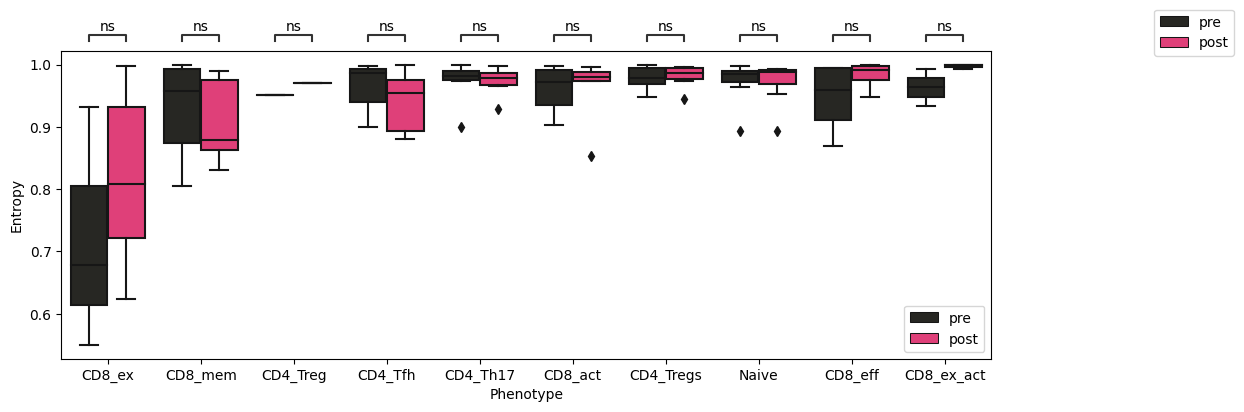

In [24]:
responder = adata[adata.obs["response"] == "R"]
tcri.pl.transcriptional_entropy(responder, phenotype_key="phenotype", groupby="patient", splitby="treatment")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

post v.s. pre: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.500e+01


<AxesSubplot: xlabel='treatment', ylabel='Entropy'>

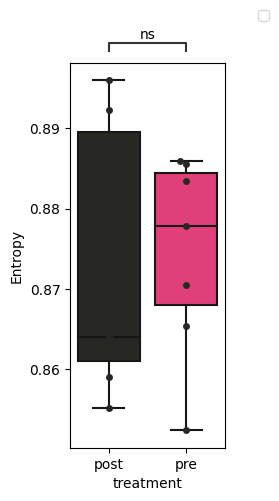

In [25]:
responder = adata[adata.obs["response"] == "R"]
tcri.pl.clonotypic_entropy(responder,groupby="patient",splitby="treatment",figsize=(2,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pre v.s. post: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.015e-01 U_stat=2.300e+01


<AxesSubplot: xlabel='treatment', ylabel='Entropy'>

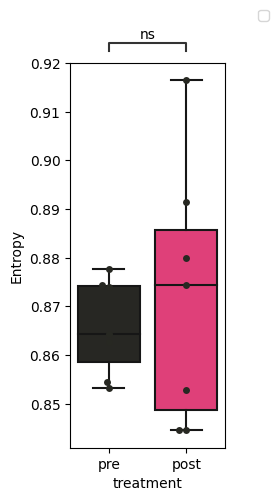

In [26]:
nonresponder = adata[adata.obs["response"] == "NR"]
tcri.pl.clonotypic_entropy(nonresponder,groupby="patient",splitby="treatment",figsize=(2,5))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

R v.s. NR: t-test independent samples with Bonferroni correction, P_val=5.088e-02 stat=-2.169e+00


<AxesSubplot: xlabel='Label', ylabel='Flux L1'>

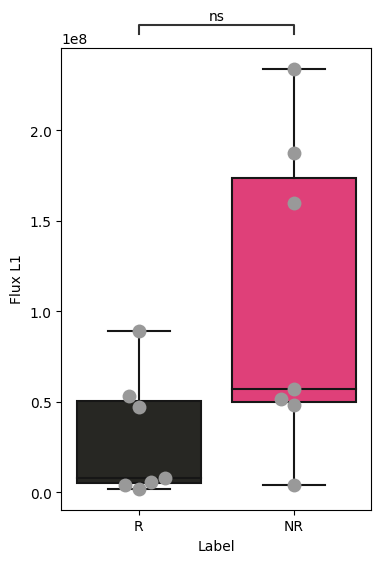

In [27]:
tcri.pl.flux(adata, "treatment", from_this="pre", to_that="post", groupby="patient", splitby="response", figsize=(4,6))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NR v.s. R: t-test independent samples with Bonferroni correction, P_val=nan stat=nan


<AxesSubplot: xlabel='Label', ylabel='Flux dkl'>

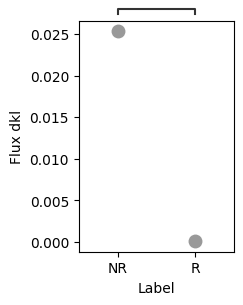

In [28]:
tcri.pl.flux(adata, "treatment", from_this="pre", to_that="post", method="dkl",
             groupby="patient", splitby="response", figsize=(2,3))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

R v.s. NR: t-test independent samples with Bonferroni correction, P_val=5.763e-02 stat=2.099e+00


<AxesSubplot: xlabel='Label', ylabel='MI'>

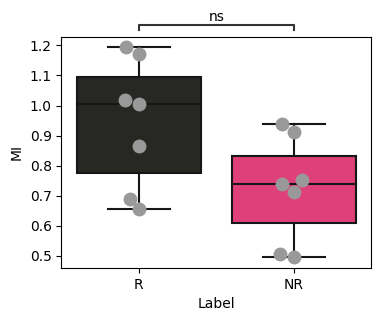

In [29]:
tcri.pl.mutual_information(adata,"patient","response",order=["R",'NR'], figsize=(4,3))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pre v.s. post: t-test independent samples with Bonferroni correction, P_val=7.736e-01 stat=2.907e-01


<AxesSubplot: xlabel='Label', ylabel='MI'>

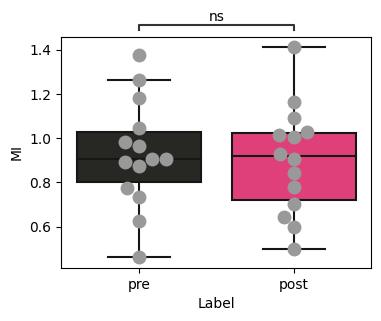

In [32]:
tcri.pl.mutual_information(adata,"patient","treatment",order=["pre","post"], figsize=(4,3))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

post v.s. pre: t-test independent samples with Bonferroni correction, P_val=3.193e-01 stat=-1.039e+00


<AxesSubplot: xlabel='Label', ylabel='MI'>

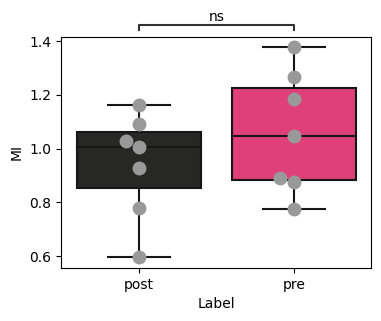

In [34]:
tcri.pl.mutual_information(responder,"patient","treatment", figsize=(4,3))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

pre v.s. post: t-test independent samples with Bonferroni correction, P_val=6.488e-01 stat=-4.671e-01


<AxesSubplot: xlabel='Label', ylabel='MI'>

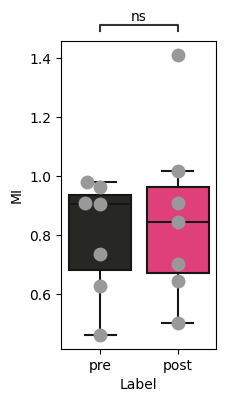

In [33]:
tcri.pl.mutual_information(nonresponder,"patient","treatment",order=["pre","post"])